# DS-SF-30 | Unit Project 1: Research Design

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: Return customer indictor (yes or no) of which free-tier customer will convert to paying customers.

> ### Question 2.  What are the predictors/covariates?

Answer: Age, gender, location, profession, customer useage data of days since last log in, and customer usage data of their activity score.

> ### Question 3.  What timeframe is this data relevent for?

Answer: January-April 2015

> ### Question 4.  What is the hypothesis?

Answer:  Demographic data and custuomer usage data will allow us to predict if a customer will convert from a free-tier customer to paying customer.

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [55]:
import os
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


> ### Question 5.  Create a data dictionary.

# Answer: (Use the template below)

Variable | Description | Type of Variable
---|---|---
admit | 0 = Not admitted, 1 = Admitted | Categorical
gre | GRE score.  GRE stands for Graduate Record Examination | Continuous
gpa | GPA score.  GPA stands for Grade Point Average | Continuous
prestige | 1 = Highest Tier, 2 = Second to Highest Tier, 3 = Second to Lowest Tier, 4 = Lowest Tier | Categorical

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

Answer: Return admittance correlation indictor (yes or no) 

> ### Question 7.  What are the predictors/covariates?

Answer:  GRE, GPA, and Prestige are predictor variables.  Past admittance history is the binary target variable.

> ### Question 8.  What timeframe is this data relevent for?

Answer:  This was not specified.

> ### Question 9.  What is the hypothesis?

Answer: GRE, GPA, and Prestige information will allow us to predict whether a person will be admitted.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer:  

This proposal is directed towards hopeful UCLA applicants to assess the likelihood of being admitted to UCLA's graduate school program.

Currently applicants are expected to provide their GPA, GRE, and previous collegiate history but their is no transparent quantifiable correlation with each input value, independent and in relation to one another, with his or her chances of admittance.

The application process can be expensive and time consuming while people apply to multiple schools.  This research will look at past application admission data and correlate admittance in relationship to their GRE, GPA, and collegiate history to better provide applicants with what information is deemed statistically significant and what scores they should evaluate in their own application to assess how likely they will be admitted to UCLA graduate school.


## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer:Primary goal of exploratory analysis is to maximize the analyst's insight into a given dataset by extracting information such as good-fitting model, list of outliers, list of important factors, and conclusions of whether individual factors are statistically significant.


> ### Question 12.  What are the assumptions of the distribution of data?

Answer: Assumptions made on the distribution include that the data is normally distributed, the data are uncorrelated over time, and the data comes from a single process represented by a single statiscal distribution.

> ### Question 13.  How will determine the distribution of your data?

Answer: Determination of the distribution can be made by construction of a histogram.

> ### Question 14.  How might outliers impact your analysis?

Answer:  Outliers can skew your analysis either to the left (negatively) or right (positively).  This will have most impact on the mean of your analysis.

> ### Question 15.  How will you test for outliers?

Answer:  Calculate the 3 interquartile values and then see if your input value a length of 1.5 times the interquartile range.

> ### Question 16.  What is colinearity?

Answer: Colinearity is when two or more predictor variables in a multiple regression model are highly correlated.

> ### Question 17.  How will you test for covariance?

Answer:  The below should return whether or not your variables are highly correlated, where a and b are your vaiables.

Covariance = numpy.cov(a, b, bias=True)[0][1]
print(Covariance)


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer:A data analysis plan is a roadmap for how you're going to organize and analyze your survey data—and it should help you achieve objectives that relate to the goal you set before you started your survey: 1. Answer your top research questions. 2. Use more specific survey questions to understand those answers.  3. Segment survey respondents to compare the opinions of different demographic groups.

Example analysis plan using the UCLA data below.

Research question:

What is the influence of GPA, GRE, and Prestige on admittance.

In [3]:
#Look at the summary of data
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


prestige   1   2   3   4
admit                   
0         28  95  93  55
1         33  53  28  12


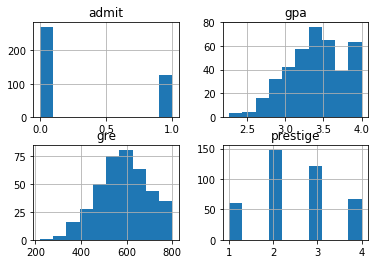

In [70]:
import pylab as pl
import numpy as np

print( pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

#Plot and display histograms of the data
df.hist()
pl.show()

In [56]:
# add a dummy ranking for each value under the prestige value.  This will alow us to assign each value from the pretige column under the original dataset into additional variables for further usage.
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print (dummy_ranks.head())

   prestige_1  prestige_2  prestige_3  prestige_4
0           0           0           1           0
1           0           0           1           0
2           1           0           0           0
3           0           0           0           1
4           0           0           0           1


In [57]:
# clean up the dataset to keep only the pertinent columns we want, including the removal of column = 'prestige' and adding the newly created dummy variables.
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print (data.head())

   admit  gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           1           0
1      1  660  3.67           0           1           0
2      1  800  4.00           0           0           0
3      1  640  3.19           0           0           1
4      0  520  2.93           0           0           1


In [58]:
# manually add the intercept
data['intercept'] = 1.0

In [59]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
print (train_cols)
print (data)

Index(['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4', 'intercept'], dtype='object')
     admit  gre   gpa  prestige_2  prestige_3  prestige_4  intercept
0        0  380  3.61           0           1           0        1.0
1        1  660  3.67           0           1           0        1.0
2        1  800  4.00           0           0           0        1.0
3        1  640  3.19           0           0           1        1.0
4        0  520  2.93           0           0           1        1.0
5        1  760  3.00           1           0           0        1.0
6        1  560  2.98           0           0           0        1.0
7        0  400  3.08           1           0           0        1.0
8        1  540  3.39           0           1           0        1.0
9        0  700  3.92           1           0           0        1.0
10       0  800  4.00           0           0           1        1.0
11       0  440  3.22           0           0           0        1.0
12       1

In [60]:
train_cols = data.columns[1:]
print (train_cols)

Index(['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4', 'intercept'], dtype='object')


In [66]:
logit = sm.Logit(data['admit'], data[train_cols])
  
# fit the model
result = logit.fit()
  
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 26 Mar 2017   Pseudo R-squ.:                 0.08166
Time:                        20:10:28   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.

In [67]:
# look at the confidence interval of each coeffecient
print (result.conf_int())

                   0         1
gre         0.000074  0.004362
gpa         0.127619  1.431056
prestige_2 -1.301337 -0.058936
prestige_3 -2.014579 -0.662776
prestige_4 -2.371624 -0.735197
intercept  -6.116077 -1.637631


The above illustrate that there is strong significance between your GPA and GRE.  Also that there is an inverse relationship between what pretigious school you went to with your acceptance.

In [71]:
# odds ratios only
print (np.exp(result.params))

gre           1.002221
gpa           2.180027
prestige_2    0.506548
prestige_3    0.262192
prestige_4    0.211525
intercept     0.020716
dtype: float64


The above odds ration will illustrate the probability of admittance based on the unit increase or describe for each variable.  From the above example, it shows that you have a 26% chance of admittance if the school you went to was from a Prestige ranked school of 3.